## Advanced Experimentation
- This section builds on unit 1
- So far, learned one test for differences in two samples: t-test
- This unit will cover other comparative tests, techniques, assumptions, and applications

## Distribution comparison tests: parametric
- Once an experiment is run and data has been collected, need to choose an analytic approach to compare A and B groups
- Determining whether or not the variables of interest are normally distributed can help decide this approach
- **Recap**: how to tell if a variable is normal
    - Plot a histogram to see sample data shape, looking for bell curve
    - QQ plot the data against a normally distributed variable
    - If a variable is normally distributed, it will form a straight line at 45* angle from bottom left to upper right

### Comparing Groups
Examples of common parametric tests for comparing groups and their non-parametric equivalents

#### Parametric vs. non-parametric
- **Parametric test**: uses some known set of parameter estimates (eg mean & std dev) to represent the information in the data
    - Appropriate when a variable takes a known distribution; it can be summarized using a few parameters
    - Not appropriate for variables that don't conform to a distribution type
        - Representing with these parameters will be misleading
        - Need to instead use non-parametric tests
- **Non-parametric test**: uses other estimates to represent certain pieces of information within a variable (such as median) but not the whole variable
    - These estimates contain less information than parametric estimates
    - Are less able to detect very small effects than parametric tests
    - Less vulnerable to bias from extreme observations

<table border="1">
<tr>
<th>Experiment Type</th>
<th colspan="2">Normally Distributed</th>
<th colspan="2">Non-Normally Distributed</th>
</tr>
<tr>
<th></th>
<th>Test</th>
<th>Function</th>
<th>Test</th>
<th>Function</th>
</tr>
<tr>
<td>A/B test, two independent groups</td>
<td>t-test for independent samples</td>
<td>[`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)</td>
<td>Mann-Whitney U test<br>
Moon's Median Test<br>
Kruskal-Wallis Test</td>
<td>[`scipy.stats.mannwhitneyu`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)<br>
[`scipy.stats.median_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test)<br>
[`scipy.stats.kruskal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)</td>
</tr>
<tr>
<td>A/B/C/… test, three or more independent groups</td>
<td>One-way ANOVA</td>
<td>[`scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)</td>
<td>Mood’s median test<br>
Kruskal-Wallis test</td>
<td>[`scipy.stats.median_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test)<br>
[`scipy.stats.kruskal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)</td>
</tr>
<tr>
<td>A/B test where all participants experience both versions</td>
<td>t-test for paired samples</td>
<td>[`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel)</td>
<td>Wilcoxon signed-rank test</td>
<td>[`scipy.stats.wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)</td>
</tr>
</table>

### Parametric tests
- If data passes a visual inspection, use a parametric test to compare differences between groups
- Focus here will be on tests that assume a normal distribution
- Logic behind parametric testing: same for 2 groups and more than 2 groups
    - Calculate how much information in the data can be explained by belonging to groups (often the diff between group means)
    - Then calculate how much information is in the data overall (often the std deviation)
    - Then divide the variance explained in the means by the total variance to get a test statistic representing the information explained by a group membership in the context of the overall variance
- In combination with sample size, this test statistic is used to estimate how likely that difference is to have occurred if the groups did not differ in population
    - The smaller this likelihood the more confident that the observed difference is a real one and not random
    - Typically a 5% threshold is used: smaller than 5% concludes that groups are not the same in population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

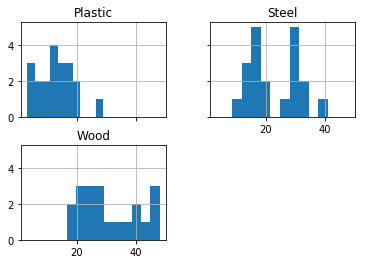

In [3]:
# compare height of wooden, steel, and plastic rollercoasters
# first create and load some coaster height data

coaster_heights = pd.DataFrame()

steel_heights = [
    18.5, 14, 30.2, 25.2024, 15, 16, 13.5, 30, 20, 17, 13.716, 8.5, 16.1, 18,
    41, 30.3, 32.004, 28.004, 30.48, 34
    ]

wood_heights = [
    38.70, 46, 27.8, 43.52, 33.77, 29.26, 16.764, 45, 48.1, 16.764, 24.384,
    24.5, 40, 35.96, 22.24, 21.33, 27.73, 23.46, 21.64, 30.12
    ]

plastic_heights = [
    9, 8.2, 12, 21, 6.3, 11.7, 19.44, 4.75, 13, 18, 15.5, 15.6, 10, 11.77, 29,
    5, 3.2, 14.75, 18.2, 17.7
    ]

coaster_heights['Steel'] = steel_heights
coaster_heights['Wood'] = wood_heights
coaster_heights['Plastic'] = plastic_heights

# visualize
coaster_heights.hist(sharey=True, sharex=True)
plt.show()

- None of these are pretty but seem sufficiently close to normal distribution (given this small sample size) that the mean and std dev would give useful information
- Comparing 3 unrelated groups of data: parametric choice is one-way ANOVA (Analysis of Variance)

### One-Way ANOVA
- **Note**: the test statistic will identify whether any of the groups differs from the others, but not which groups are the different ones

\begin{equation}
F=\frac{{n\sum(\bar{Y}_j-\bar{Y})^2}/{(a-1)}}{{\sum\sum(Y_{ij}-\bar{Y}_j)^2}/{(N-a)}}
\end{equation}

*n* = number of datapoints in each group
$\bar{Y}_j$ = mean for the *j*th group
$\bar{Y}$ = the overall mean
$Y_{ij}$ = the *i*th value of *j*th group
*a* = the number of groups
*N* =  the total number of datapoints

- Logic of one-way ANOVA: compare how much the group means $\bar{Y}_j$ differ from the overall mean $\bar{Y}$ to how much the observations within each group $Y_{ij}$ differ from the mean of that group $\bar{Y}_j$
- The ratio of the average group difference to the average within-group variance is used in combination with the sample size $N$ to calculate the probability of getting a difference that large in the sample if there were no meaningful difference between the groups in the population

Steel      22.57532
Wood       30.85210
Plastic    13.20550
dtype: float64


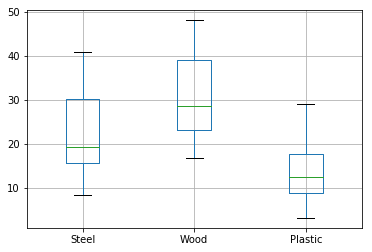

21.515815855142634
1.0927449918229045e-07


In [4]:
# printing the means for each group
print(coaster_heights.mean())

coaster_heights.boxplot()
plt.show()

F, p = stats.f_oneway(coaster_heights['Steel'],
                      coaster_heights['Wood'],
                      coaster_heights['Plastic'])

# print f statistic
print(F)

# the probability, a p<0.5 would lead one to believe the gorup means were not
# all similar in the population
print(p)

- Three groups appear to likely differ in population (p < .0001)
- Determining which group is the odd one out
    - Visual inspection of histograms suggest that plastic roller coasters are shorter than steel and wood
    - To test this, perform a set of pairwise t-tests comparing each group to each other group

In [5]:
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Wood']))
print(stats.ttest_ind(coaster_heights['Steel'], coaster_heights['Plastic']))
print(stats.ttest_ind(coaster_heights['Plastic'], coaster_heights['Wood']))

Ttest_indResult(statistic=-2.785911485728798, pvalue=0.008281657085474181)
Ttest_indResult(statistic=3.8446067874474887, pvalue=0.00044650642104150624)
Ttest_indResult(statistic=-6.683437837231596, pvalue=6.614422528990009e-08)


- Results indicate all three groups differ significantly from one another
- Wood is highest, steel second, then plastic

### Tests for Dependent Groups
- Assumption so far has been that groups being compared are made up of different people
- Sometimes want to compare someone to themselves to see if changing something will change their reaction
- This leads to dependent groups: if response to condition A is known, have some information on how they might respond to condition B
- Different statistical methods are needed to compare condition A to B
- Paired t-test: use to compare two depended (or 'paired') groups:
    - Differs from an independent t-test in two ways:
        1. Difference score is calculated by subtracting each pair of scores, then calculating the mean different
            - As opposed to calculating the difference of the means
            - If there is no missing data, these methods are identical
            - If in paired t-test a person is missing in condition A, their condition B data is discarded
        2. The error term is calculated as the std dev of the difference scores